In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

# In the annotation phase, we split the data into 1000 data slices
# Now, let's recombine them into one
dataframes = {}
splits = ["0_999", "1000_1999", "2000_2999", "3000_3999", "4000_4999", "5000_5999", "6000_6025"]

for i, split in enumerate(splits):
    dataframes[i] = pd.read_csv(f"../data/gpt4_annotations/gpt4_annotations_{split}.tsv", sep = "\t")
# Concatenate the DataFrames along the rows axis
df = pd.concat(dataframes.values(), ignore_index=True)
df

,speech_id,sentence,label
0,http://ldf.fi/semparl/speeches/s2021_1_124_201,Ensimmäiseen käsittelyyn esitellään päiväjärje...,0
1,http://ldf.fi/semparl/speeches/s2021_1_124_201,Käsittelyn pohjana on lakivaliokunnan mietintö...,0
2,http://ldf.fi/semparl/speeches/s2021_1_124_201,Nyt päätetään lakiehdotusten sisällöstä.,0
3,http://ldf.fi/semparl/speeches/s2021_1_124_201,"— Yleiskeskustelu, edustaja Keto-Huovinen, olk...",0
4,http://ldf.fi/semparl/speeches/s2021_1_124_202,"Kiitos, arvoisa puhemies!",0
...,...,...,...
6020,http://ldf.fi/semparl/speeches/s2021_1_091_040,— Kiitoksia.,0
6021,http://ldf.fi/semparl/speeches/s2021_1_091_041,"Keskustelu on päättynyt, ja samalla totean, et...",1
6022,http://ldf.fi/semparl/speeches/s2021_1_091_042,Ainoaan käsittelyyn esitellään päiväjärjestyks...,0
6023,http://ldf.fi/semparl/speeches/s2021_1_091_042,"Puhemiesneuvosto ehdottaa, että eduskunta päät...",0


In [2]:
df["label"].value_counts()

label
0    3989
2     848
5     537
6     376
7     120
8      66
1      43
3      34
4      12
Name: count, dtype: int64

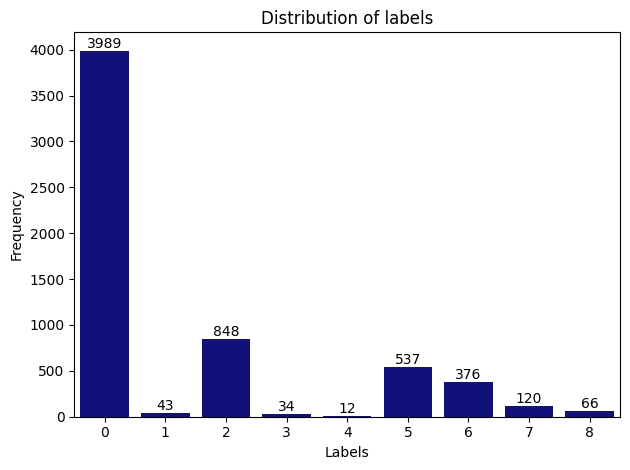

In [11]:
# Create a histogram plot using Seaborn
ax = sns.barplot(df["label"].value_counts(), color='darkblue')  # Create the histogram plot
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('Distribution of labels')  # Set the title of the plot
plt.xlabel('Labels')  # Set the label for the x-axis
plt.ylabel('Frequency')  # Set the label for the y-axis
plt.tight_layout()
#plt.savefig("../figures/label_distribution")
plt.show()  # Show the plot

In [12]:
# Add unique ids for each sentence that we might need later
sentence_ids = [i for i in range(len(df))]
df["sentence_id"] = sentence_ids
# Reorder columns
df = df[['speech_id', 'sentence_id', 'sentence', 'label']]
# Rename sentence to text for clarity in training stage
df = df.rename(columns={'sentence': 'text'})
df

,speech_id,sentence_id,text,label
0,http://ldf.fi/semparl/speeches/s2021_1_124_201,0,Ensimmäiseen käsittelyyn esitellään päiväjärje...,0
1,http://ldf.fi/semparl/speeches/s2021_1_124_201,1,Käsittelyn pohjana on lakivaliokunnan mietintö...,0
2,http://ldf.fi/semparl/speeches/s2021_1_124_201,2,Nyt päätetään lakiehdotusten sisällöstä.,0
3,http://ldf.fi/semparl/speeches/s2021_1_124_201,3,"— Yleiskeskustelu, edustaja Keto-Huovinen, olk...",0
4,http://ldf.fi/semparl/speeches/s2021_1_124_202,4,"Kiitos, arvoisa puhemies!",0
...,...,...,...,...
6020,http://ldf.fi/semparl/speeches/s2021_1_091_040,6020,— Kiitoksia.,0
6021,http://ldf.fi/semparl/speeches/s2021_1_091_041,6021,"Keskustelu on päättynyt, ja samalla totean, et...",1
6022,http://ldf.fi/semparl/speeches/s2021_1_091_042,6022,Ainoaan käsittelyyn esitellään päiväjärjestyks...,0
6023,http://ldf.fi/semparl/speeches/s2021_1_091_042,6023,"Puhemiesneuvosto ehdottaa, että eduskunta päät...",0


In [13]:
# Now let's create the train, validate and test splits
# For the test split, we'll use the speeches that are also human annotated
with open("../data/annotointidata/evaluationdata_ids.txt", "r") as f:
    test_ids = f.readlines()
    test_ids = [i.strip("\n") for i in test_ids]

mask = df["speech_id"].isin(test_ids)
test_df = df[mask]


# Remove the test data speeches from the df
# The ~ operator acts as a negator
df = df[~df['speech_id'].isin(test_ids)]

# Split the DataFrame into train and validation sets
train_df, validation_df = train_test_split(df, test_size=0.1, random_state=42)

print(len(train_df))
print(len(validation_df))
print(len(test_df))

5196
578
251


In [9]:
train_df.to_csv("../data/gpt4_annotations/gpt4_annotations_train.tsv", sep = "\t", index = False)
validation_df.to_csv("../data/gpt4_annotations/gpt4_annotations_validation.tsv", sep = "\t", index = False)
test_df.to_csv("../data/gpt4_annotations/gpt4_annotations_test.tsv", sep = "\t", index = False)